<center>IE 7300: Statistical Learning for Engineering</center>

### <center>HW 4</center>
<center>Youyu Zhang</center>
<center>zhang.youy@northeastern.edu</center>
<center>(530)574-2826</center>

1. Create a custom logistic regression model using the following dataset (20 points)
The data is sourced from study of Abalone in Tasmania. It can be found at the UCI Machine Learning RepositoryLinks to an external site.. The dataset contains 4,141 observations and 10 variables.

SEX = M (male), F (female), I (infant)

LENGTH = Longest shell length in mm

DIAM = Diameter perpendicular to length in mm

HEIGHT = Height perpendicular to length and diameter in mm

WHOLE = Whole weight of abalone in grams

SHUCK = Shucked weight of meat in grams

VISCERA = Viscera weight in grams

SHELL = Shell weight after drying in grams

RINGS = Age (+1.5 gives the age in years)

CLASS = Age classification from 1 to 6 (A1= youngest,..., A6=oldest)

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
filepath = "abalone.data"
col = ["Sex","Length","Diameter","Height","Whole","Shuck","Viscera","Shell","Rings"]
data = pd.read_csv(filepath, delimiter=",",names=col)
data

,Sex,Length,Diameter,Height,Whole,Shuck,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Classifing the samples by age (rings+1.5), I use the mean and standard deviation as a reference.

c:\Users\youyu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

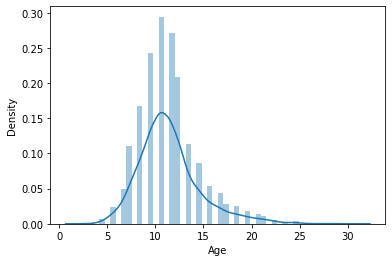

In [161]:
data['Age'] = data['Rings']+1.5
sns.distplot(data['Age'])

In [162]:
age_mean = data['Age'].mean()
age_std = data['Age'].std()
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Add classification and corresponding color for later process.
data['Class'] = "A1"
data['Color'] = color[0]
data['Class'][(data['Age']>=age_mean-2*age_std)&(data['Age']<age_mean-age_std)] = "A2"
data['Color'][(data['Age']>=age_mean-2*age_std)&(data['Age']<age_mean-age_std)] = color[1]
data['Class'][(data['Age']>=age_mean-age_std)&(data['Age']<age_mean)] = "A3"
data['Color'][(data['Age']>=age_mean-age_std)&(data['Age']<age_mean)] = color[2]
data['Class'][(data['Age']>=age_mean)&(data['Age']<age_mean+age_std)] = "A4"
data['Color'][(data['Age']>=age_mean)&(data['Age']<age_mean+age_std)] = color[3]
data['Class'][(data['Age']>=age_mean+age_std)&(data['Age']<age_mean+2*age_std)] = "A5"
data['Color'][(data['Age']>=age_mean+age_std)&(data['Age']<age_mean+2*age_std)] = color[4]
data['Class'][(data['Age']>=age_mean+2*age_std)] = "A6"
data['Color'][(data['Age']>=age_mean+2*age_std)] = color[5]

# Convert column sex as a numerical variable.
data['Sex'][data['Sex']=='M'] = 1
data['Sex'][data['Sex']=='F'] = 2
data['Sex'][data['Sex']=='I'] = 0
data

C:\Users\youyu\AppData\Local\Temp/ipykernel_29260/3549557492.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Class'][(data['Age']>=age_mean-2*age_std)&(data['Age']<age_mean-age_std)] = "A2"
C:\Users\youyu\AppData\Local\Temp/ipykernel_29260/3549557492.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Color'][(data['Age']>=age_mean-2*age_std)&(data['Age']<age_mean-age_std)] = color[1]
C:\Users\youyu\AppData\Local\Temp/ipykernel_29260/3549557492.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

,Sex,Length,Diameter,Height,Whole,Shuck,Viscera,Shell,Rings,Age,Class,Color
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,A5,#9467bd
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,A3,#2ca02c
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,A3,#2ca02c
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,A4,#d62728
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,A3,#2ca02c
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,A4,#d62728
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,A4,#d62728
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,A3,#2ca02c
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,A4,#d62728


In [163]:
train_length = round(data.shape[0]*0.8)
df_train = data.loc[0:train_length-1]
df_test = data.loc[train_length:]

x_train = df_train.drop(['Rings','Age','Class','Color'], axis=1).to_numpy()
y_train = df_train['Class']

x_test = df_test.drop(['Rings','Age','Class','Color'], axis=1).to_numpy()
y_test = df_test['Class']

b) Custom logistic regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

In [164]:
class LogisticRegression:
    def __init__(self, epochs: int=2000, threshold: float=1e-3) -> None:
        self.epochs = epochs
        self.threshold = threshold

    def train(self, x, y, batch_size=64, lr=0.001):
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        x = np.insert(x, 0, 1, axis=1)
        y = np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),x.shape[1]))
        i = 0
        while (not self.epochs or i < self.epochs):
            self.loss.append(self.cross_entropy(y, self.predict_(x)))
            idx = np.random.choice(x.shape[0], batch_size)
            x_batch, y_batch = x[idx], y[idx]
            error = y_batch - self.predict_(x_batch)
            update = (lr * np.dot(error.T, x_batch))
            self.weights = np.add(self.weights, update)
            # self.weights += update
            if np.abs(update).max() < self.threshold: 
                break
            if i % (self.epochs/5)  == 0: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(x, y)))
            i +=1
        return self

    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def predict(self, x):
        x = np.insert(x, 0, 1, axis=1)
        pre_vals = np.dot(x, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z.astype(float))/np.sum(np.exp(z.astype(float)), axis=1).reshape(-1,1)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))

    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))


c) Predict the age category using test dataset, and provide some insights

Following part is going to predict the category. The training parameters can be set to default values.

For example, epoch=2000. When the update value less than the setup threshold, the epoch will also stop.

We can see that when epoch>3000, training accuracy did not increase too much as it was in the previous epochs.

In [165]:
lr1 = LogisticRegression(epochs=5000)
lr1.train(x_train,y_train)

 Training Accuray at 0 iterations is 0.37552363853979653
 Training Accuray at 1000 iterations is 0.5173548773189707
 Training Accuray at 2000 iterations is 0.5397965290245362
 Training Accuray at 3000 iterations is 0.5508677438659485
 Training Accuray at 4000 iterations is 0.5580490724117295


In [166]:
def category_pointer(y_cat, y_pred):
    """
    This function translate numerical training result to categorical. 
    """
    ind = y_pred.argmax(axis=1)
    y_class = []
    y_pointer = list(enumerate(np.unique(y_cat)))
    for i in range(len(ind)):
        y_class.append(y_pointer[ind[i]][1])
    return y_class

y_pred_test = lr1.predict_(np.insert(x_test, 0, 1, axis=1))
y_pred_test = category_pointer(y_cat=y_train,y_pred=y_pred_test)

d) Show the predicted output, and loss function output plots, and explain the outcome

This loss function change indicated that this model works as expected - reducing loss and getting closer to the accurate prediction.

The result histogram indicated that only categories with large sample points are predicted. The categories which has fewer examples are not in the predict result. This could happen when the large population categories samples has overlapped attributes range with the small population categories. 

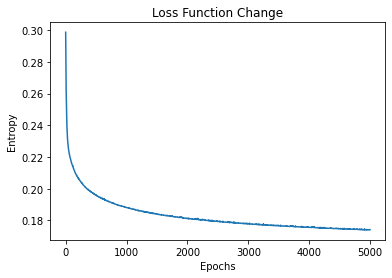

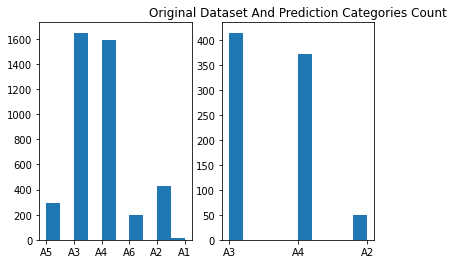

In [167]:
plt.plot(lr1.loss)
plt.title('Loss Function Change')
plt.xlabel('Epochs')
plt.ylabel('Entropy')
plt.show()

fig, ax = plt.subplots(1,2)
ax[0].hist(data['Class'])
ax[1].hist(y_pred_test)
plt.title('Original Dataset And Prediction Categories Count')
plt.show()

e) Calculate the Confusion matrix and explain the model accuracy

Confusion matrix indicated that most cases were correctly predicted. The cases in of the middle age has more successful prediction cases because the population was large. No extreme old or yound samples exist in this test dataset.

A3 and A4 are the most confusing classes because they both are in middle age, large population, and the differences between them are not so obvious.

In [168]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred_test)

array([[  0,   3,   0,   0,   0,   0],
       [  0,  41,  50,   1,   0,   0],
       [  0,   6, 240, 103,   0,   0],
       [  0,   0, 104, 232,   0,   0],
       [  0,   0,  16,  20,   0,   0],
       [  0,   0,   4,  15,   0,   0]], dtype=int64)

2. Perform Principal component Analysis for the same dataset (15 points)

In [176]:
class PCA:
    def __init__(self, n_components):
        """
        n_components: indicate top n components.
        """
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, x):
        self.mean = np.mean(x, axis=0)
        x = x - self.mean
        cov = np.cov(x.T.astype(float))

        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.components = eigenvectors[0:self.n_components]

    def transform(self, x):
        x = x - self.mean
        return np.dot(x, self.components.T)
        

a) Show top 3 of the PCA component output



In [177]:
pca = PCA(3)
pca.fit(x_train)
x_project = pca.transform(x_test)
x1 = x_project[:, 0]
x2 = x_project[:, 1]
x3 = x_project[:, 2]

pca.components

array([[-0.87744065, -0.096913  , -0.08120762, -0.03115321, -0.40384116,
        -0.17119429, -0.0890907 , -0.11317353],
       [-0.47935655,  0.1616997 ,  0.13162168,  0.04662343,  0.73977672,
         0.33754001,  0.15602073,  0.19755295],
       [ 0.01582429, -0.28348613, -0.26436452, -0.12241118, -0.05663612,
         0.72462768,  0.00354735, -0.55335937]])

In [171]:
pd.DataFrame({'x1':x1,'x2':x2,'x3':x3})


,x1,x2,x3
0,0.281147,-0.495878,-0.013759
1,-0.625177,-0.922591,-0.006249
2,1.056076,0.168829,-0.101029
3,-0.743266,-0.707322,-0.03788
4,1.064549,0.153196,-0.102906
...,...,...,...
830,-0.912258,-0.398094,-0.009919
831,-0.078328,0.162773,0.012561
832,-0.195815,0.377584,0.016665
833,-1.039086,-0.163919,0.044639


b) Plot the PCA 1, PCA 2 , and PCA2 components


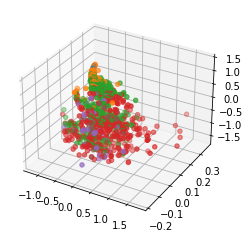

In [172]:
ax = plt.axes(projection='3d')
zdata = x1
xdata = x2
ydata = x3
ax.scatter3D(xdata, ydata, zdata,c=df_test['Color']);

c) Could you use PCA component for logistic regression? 

Following parts use train data with PCA process. Then predict the result with test data after PCA process.

Comparing the confusion matrix, I would not suggest PCA for logistic regression in this case. Because the result with PCA has lower accuracy in the testing dataset.

In [173]:
x_train_pca = pca.transform(x_train)
pca_lr = LogisticRegression(epochs=5000).train(x_train_pca,y_train)

 Training Accuray at 0 iterations is 0.5101735487731897
 Training Accuray at 1000 iterations is 0.5257330939557151
 Training Accuray at 2000 iterations is 0.5499700777977259
 Training Accuray at 3000 iterations is 0.5541591861160982
 Training Accuray at 4000 iterations is 0.5589467384799521


In [174]:
y_pred_pca = pca_lr.predict_(np.insert(x_project, 0, 1, axis=1))
y_pred_pca = category_pointer(y_cat=y_train,y_pred=y_pred_pca)

# Result with PCA
confusion_matrix(y_test,y_pred_pca)

array([[  0,   3,   0,   0,   0,   0],
       [  0,  49,  42,   1,   0,   0],
       [  0,  14, 222, 113,   0,   0],
       [  0,   0,  90, 246,   0,   0],
       [  0,   0,  15,  21,   0,   0],
       [  0,   0,   4,  15,   0,   0]], dtype=int64)

In [175]:
# Result without PCA
confusion_matrix(y_test,y_pred_test)

array([[  0,   3,   0,   0,   0,   0],
       [  0,  41,  50,   1,   0,   0],
       [  0,   6, 240, 103,   0,   0],
       [  0,   0, 104, 232,   0,   0],
       [  0,   0,  16,  20,   0,   0],
       [  0,   0,   4,  15,   0,   0]], dtype=int64)